
# Upwork Job Analysis





Dataset can be found on [Kaggle](https://www.kaggle.com/datasets/hashiromer/upwork-jobs/data)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
sns.set_palette("pastel")

In [2]:
df = pd.read_csv('./1_6_2023_general.csv')

In [3]:
df.columns

Index(['connect_price', 'created_on', 'tz_date', 'duration', 'engagement',
       'enterprise_job', 'freelancers_to_hire', 'amount_amount', 'hourly_rate',
       'type', 'job_ts', 'proposals_tier', 'published_on', 'renewed_on',
       'tier', 'title', 'total_freelancers_to_hire', 'uid',
       'client_company_org_uid', 'client_total_feedback',
       'client_total_reviews', 'client_total_spent', 'client_location_country',
       'occupations_category_pref_label', 'occupations_oservice_pref_label'],
      dtype='object')

<Axes: xlabel='proposals_tier', ylabel='count'>

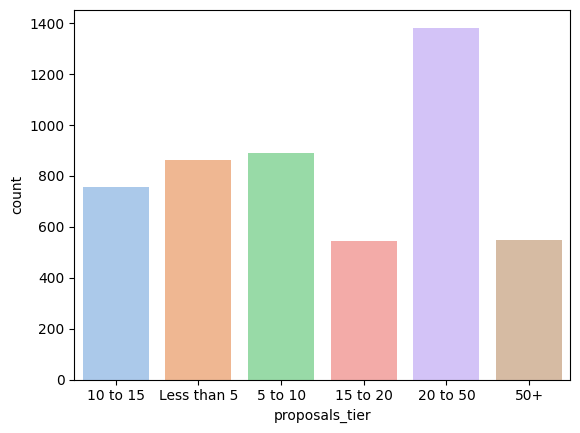

In [ ]:
sns.countplot(data = df, x = 'proposals_tier')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4969 entries, 0 to 4989
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   connect_price                    4969 non-null   int64  
 1   created_on                       4969 non-null   object 
 2   tz_date                          4969 non-null   object 
 3   duration                         4969 non-null   object 
 4   engagement                       2863 non-null   object 
 5   enterprise_job                   4969 non-null   bool   
 6   freelancers_to_hire              4969 non-null   int64  
 7   amount_amount                    2106 non-null   float64
 8   hourly_rate                      1999 non-null   float64
 9   type                             4969 non-null   object 
 10  job_ts                           4969 non-null   int64  
 11  proposals_tier                   4969 non-null   object 
 12  published_on             

In [ ]:
df.duplicated().sum()

21

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
jobs = df[['connect_price','duration', 'proposals_tier', 'enterprise_job', 'freelancers_to_hire',
           'amount_amount', 'hourly_rate', 'type', 'client_total_spent','client_location_country',
           'occupations_category_pref_label', 'occupations_oservice_pref_label']]

In [ ]:
jobs.head()

,connect_price,duration,proposals_tier,enterprise_job,freelancers_to_hire,amount_amount,hourly_rate,type,client_total_spent,client_location_country,occupations_category_pref_label,occupations_oservice_pref_label
0,4,More than 6 months,10 to 15,False,1,NaN,35.0,hourly,0.00,United States,"Web, Mobile & Software Dev",Ecommerce Website Development
1,4,More than 6 months,Less than 5,False,1,100.0,NaN,fixed_budget,7198.00,Germany,Design & Creative,Graphic Design
2,2,1 to 3 months,Less than 5,False,1,5.0,NaN,fixed_budget,6647.85,Ireland,Sales & Marketing,Email Marketing
3,4,More than 6 months,Less than 5,False,1,200.0,NaN,fixed_budget,519.67,United Kingdom,Design & Creative,Video Editing
4,2,Less than 1 month,Less than 5,False,1,NaN,17.5,hourly,2086.66,United Arab Emirates,"Web, Mobile & Software Dev",Front-End Development


In [ ]:
jobs = df[['connect_price','duration', 'proposals_tier', 'enterprise_job', 'freelancers_to_hire',
           'amount_amount', 'hourly_rate', 'type', 'client_total_spent', 'client_total_feedback',
           'client_total_reviews', 'client_location_country','occupations_category_pref_label', 'occupations_oservice_pref_label']]

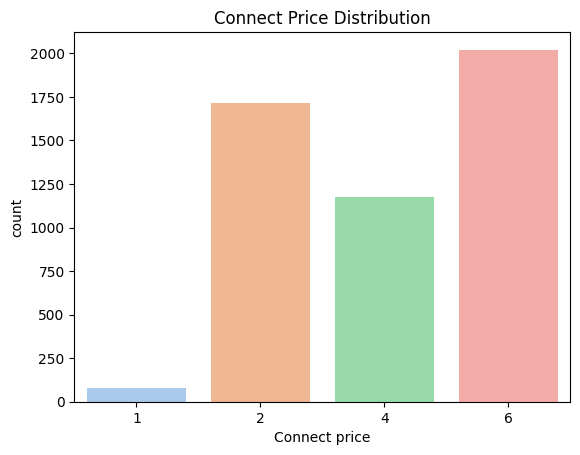

In [ ]:
sns.countplot(data = jobs, x = 'connect_price')
plt.xlabel("Connect price")
plt.title("Connect Price Distribution")
plt.show()

<Axes: xlabel='duration', ylabel='count'>

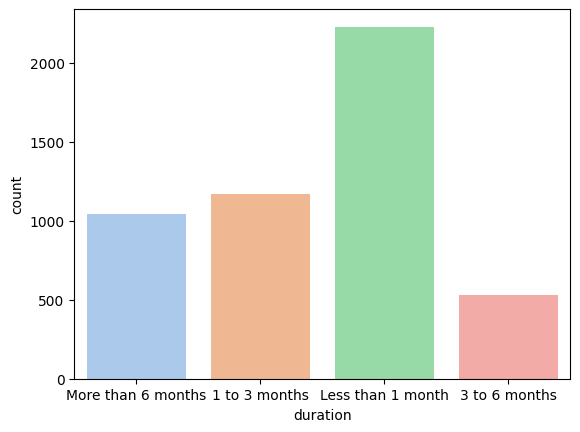

In [ ]:
sns.countplot(data = jobs, x = 'duration')

<Axes: >

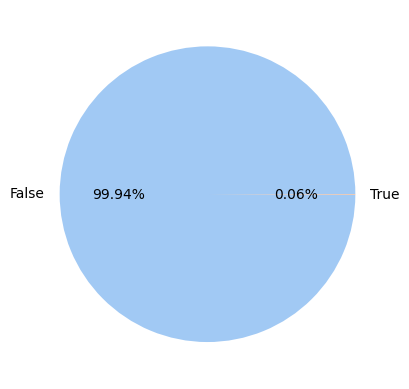

In [ ]:
# Plotting the pie chart for enterprise_job
#plt.figure(figsize=(10,6))
#jobs.groupby(['enterprise_job']).sum().plot(kind='pie', y = 'enterprise_job', autopct='%1.0f%%')
jobs.groupby(['enterprise_job']).size().plot(kind='pie', autopct='%.2f%%')

<Axes: >

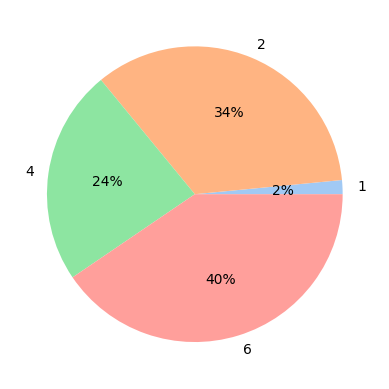

In [ ]:
jobs.groupby(['connect_price']).size().plot(kind='pie', autopct='%1.0f%%')

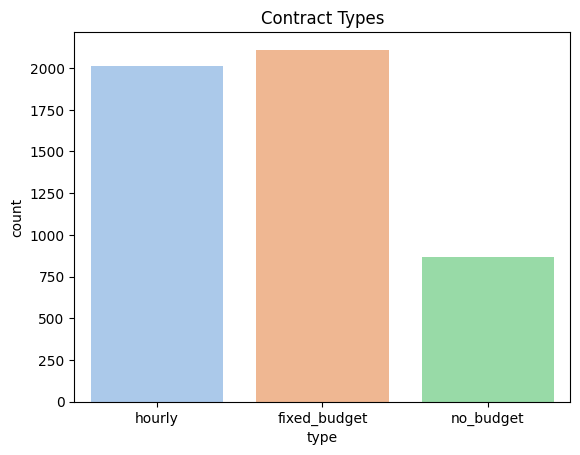

In [ ]:
sns.countplot(data = jobs, x = 'type')
plt.title("Contract Types")
plt.show()

## Number of jobs by category

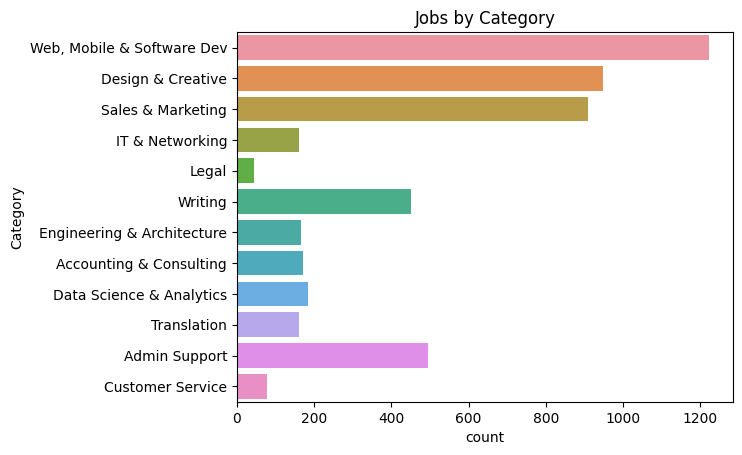

In [ ]:
sns.countplot(data = jobs, y = 'occupations_category_pref_label')
plt.ylabel("Category")
plt.title("Jobs by Category")
plt.show()

In [ ]:
jobs.groupby(by='occupations_category_pref_label')['amount_amount'].mean()

occupations_category_pref_label
Accounting & Consulting       1847.948718
Admin Support                  770.857143
Customer Service               380.380952
Data Science & Analytics       454.871795
Design & Creative              258.965587
Engineering & Architecture     390.935484
IT & Networking                262.180328
Legal                          145.500000
Sales & Marketing             1115.550000
Translation                    185.091954
Web, Mobile & Software Dev     808.421154
Writing                        801.879668
Name: amount_amount, dtype: float64

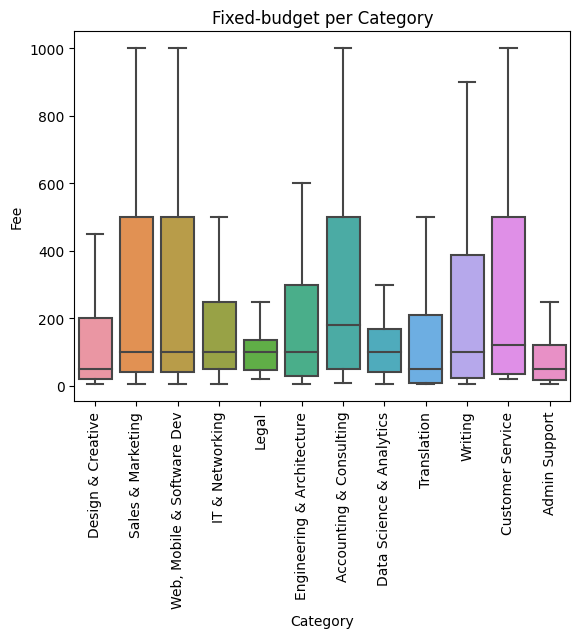

In [ ]:
c = jobs[jobs['type'] == 'fixed_budget']
sns.boxplot(data = c, x = 'occupations_category_pref_label', y = 'amount_amount', sym = '')
plt.xlabel("Category")
plt.ylabel("Fee")
plt.title("Fixed-budget per Category")
plt.xticks(rotation = 90)
plt.show()

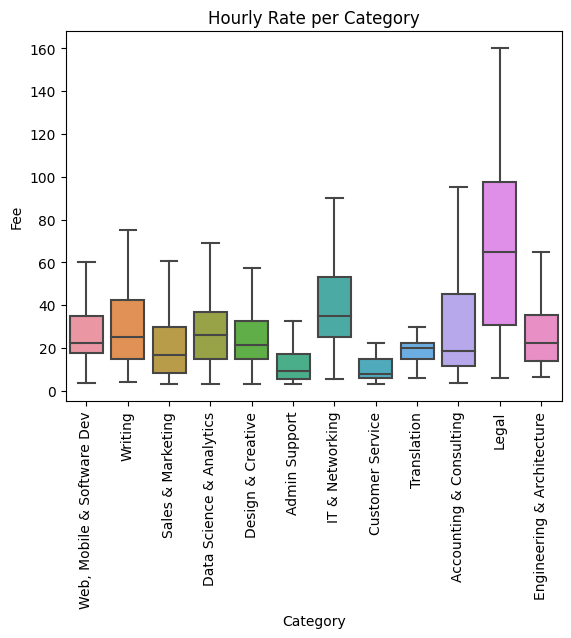

In [ ]:
c = jobs[jobs['type'] == 'hourly']
sns.boxplot(data = c, x = 'occupations_category_pref_label', y = 'hourly_rate', sym = '')
plt.xlabel("Category")
plt.ylabel("Fee")
plt.title("Hourly Rate per Category")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Basic statistics for the salary columns
jobs[jobs['type']=='fixed_budget'].describe()['amount_amount']

count      2106.000000
mean        667.840931
std        4212.515244
min           5.000000
25%          25.000000
50%         100.000000
75%         300.000000
max      100000.000000
Name: amount_amount, dtype: float64

In [ ]:
jobs[jobs['type']=='hourly'].describe()['hourly_rate']

count    1999.000000
mean       26.187969
std        31.325573
min         3.000000
25%        11.500000
50%        20.000000
75%        32.500000
max       749.500000
Name: hourly_rate, dtype: float64

<Axes: xlabel='duration', ylabel='amount_amount'>

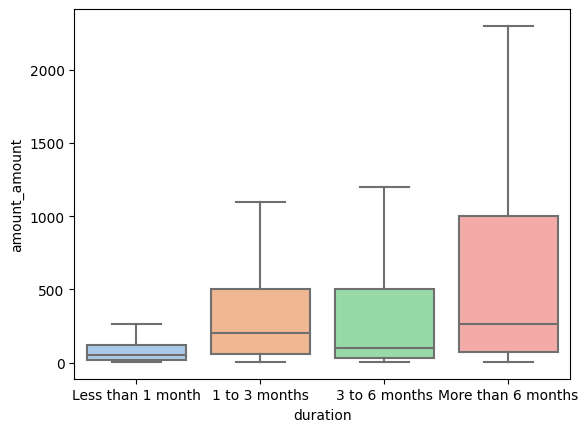

In [ ]:
sns.boxplot(data = jobs[jobs['type']=='fixed_budget'], x = 'duration', y = 'amount_amount', sym = '',
           order = ['Less than 1 month', '1 to 3 months', '3 to 6 months', 'More than 6 months'])

In [ ]:
jobs[jobs['type']=='hourly'].describe()['hourly_rate']

count    1999.000000
mean       26.187969
std        31.325573
min         3.000000
25%        11.500000
50%        20.000000
75%        32.500000
max       749.500000
Name: hourly_rate, dtype: float64

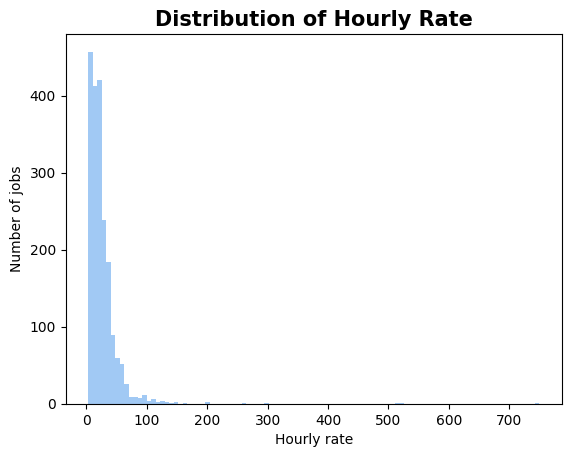

In [ ]:
plt.hist(x = jobs[jobs['type']=='hourly']['hourly_rate'], bins = 100)
plt.xlabel('Hourly rate', fontsize = 10)
plt.ylabel('Number of jobs', fontsize = 10)
plt.title('Distribution of Hourly Rate', fontsize = 15, fontweight = 'bold')
plt.show()

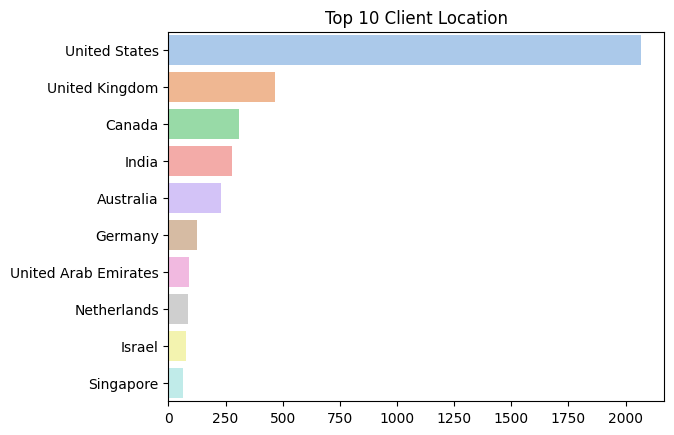

In [ ]:
sns.countplot(data = jobs, y = 'client_location_country',
             order = jobs.client_location_country.value_counts().iloc[:10].index)
plt.title("Top 10 Client Location")
plt.xlabel("")
plt.ylabel("")
plt.show()

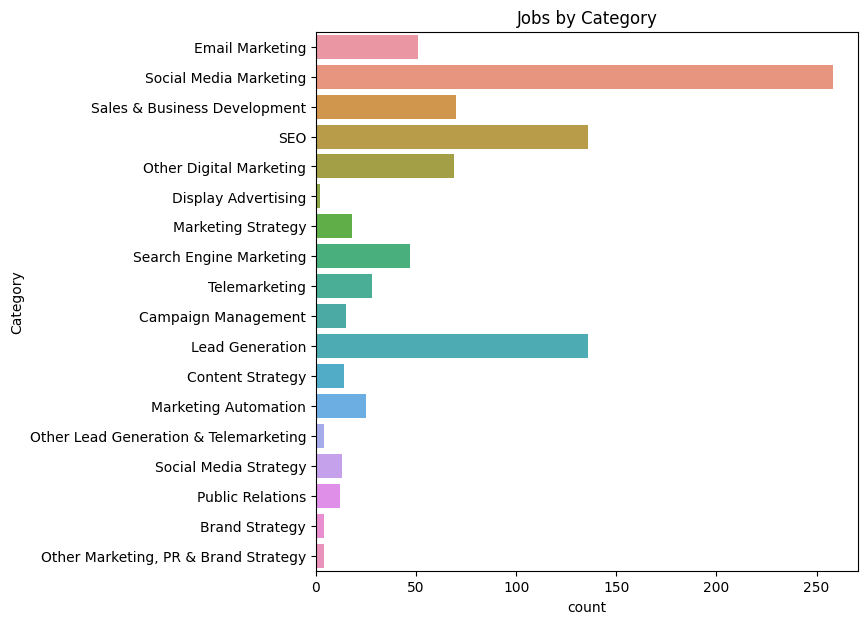

In [ ]:
fig, ax = pyplot.subplots(figsize=(7,7))
ax = sns.countplot(data = jobs[jobs['occupations_category_pref_label']=='Sales & Marketing'], y = 'occupations_oservice_pref_label', ax = ax)
plt.ylabel("Category")
plt.title("Jobs by Category")
plt.show()

In [ ]:
jobs['occupations_category_pref_label'].unique()

array(['Web, Mobile & Software Dev', 'Design & Creative',
       'Sales & Marketing', 'IT & Networking', 'Legal', 'Writing',
       'Engineering & Architecture', 'Accounting & Consulting',
       'Data Science & Analytics', 'Translation', 'Admin Support',
       'Customer Service'], dtype=object)

In [ ]:
c = jobs.groupby(by = 'occupations_category_pref_label')['proposals_tier'].count()
sns.barplot(data = c, x = 'occupations_category_pref_label')

In [ ]:
jobs.groupby(by = ['proposals_tier', 'occupations_category_pref_label'])['occupations_category_pref_label'].count()

In [ ]:
c = [jobs.groupby(by = ['proposals_tier', 'occupations_category_pref_label'])['occupations_category_pref_label'].value_counts()]

<Axes: xlabel='occupations_category_pref_label'>

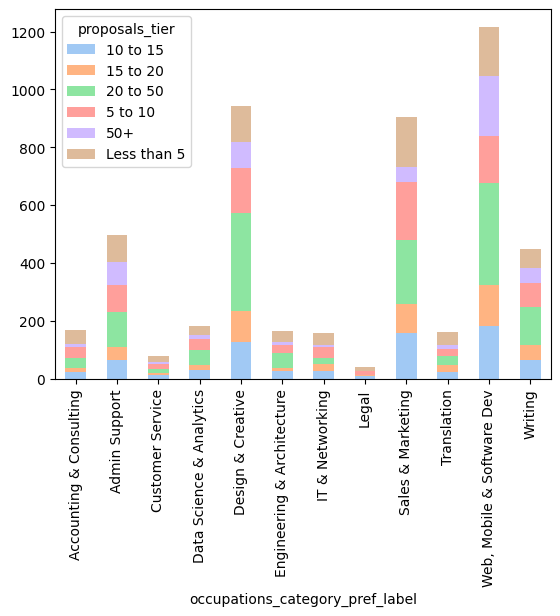

In [ ]:
jobs.groupby(['occupations_category_pref_label'])['proposals_tier'].value_counts().unstack().plot(kind='bar',stacked = True)

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.02%}',
                    ha="center",va="bottom")

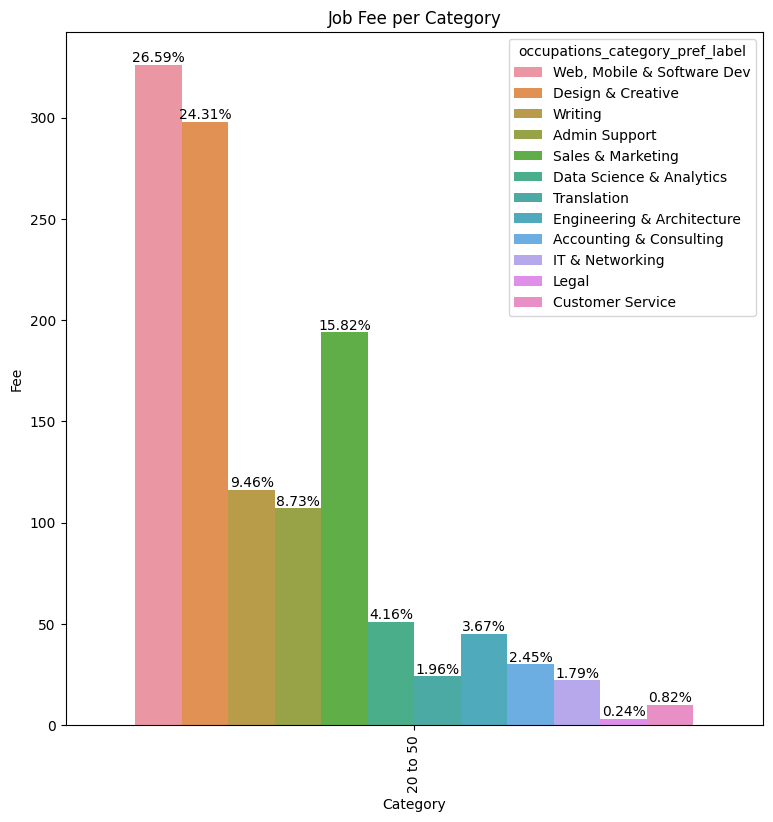

In [ ]:
c = jobs[jobs['proposals_tier'] =='20 to 50']
fig, ax = pyplot.subplots(figsize = (9,9))
ax = sns.countplot(data = c, x = 'proposals_tier', hue = 'occupations_category_pref_label')
barPerc(c, 'proposals_tier', ax)
plt.xlabel("Category")
plt.ylabel("Fee")
plt.title("Job Fee per Category")
plt.xticks(rotation = 90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Design & Creative'),
  Text(1, 0, 'Sales & Marketing'),
  Text(2, 0, 'Web, Mobile & Software Dev'),
  Text(3, 0, 'IT & Networking'),
  Text(4, 0, 'Legal'),
  Text(5, 0, 'Writing'),
  Text(6, 0, 'Engineering & Architecture'),
  Text(7, 0, 'Accounting & Consulting'),
  Text(8, 0, 'Data Science & Analytics'),
  Text(9, 0, 'Translation'),
  Text(10, 0, 'Admin Support'),
  Text(11, 0, 'Customer Service')])

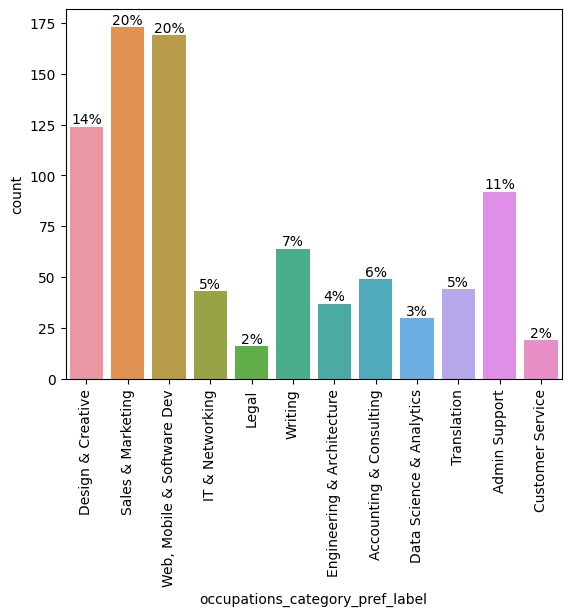

In [ ]:
c = jobs[jobs['proposals_tier'] =='Less than 5']
ax = sns.countplot(data = c, x = 'occupations_category_pref_label')
barPerc(c, 'proposals_tier', ax)
plt.xticks(rotation = 90)

In [ ]:
c = jobs.loc[jobs.proposals_tier == 'Less than 5']
c.append(pd.Series(jobs.loc[jobs.proposals_tier == '5 to 10']))

<Axes: xlabel='client_total_feedback', ylabel='client_total_spent'>

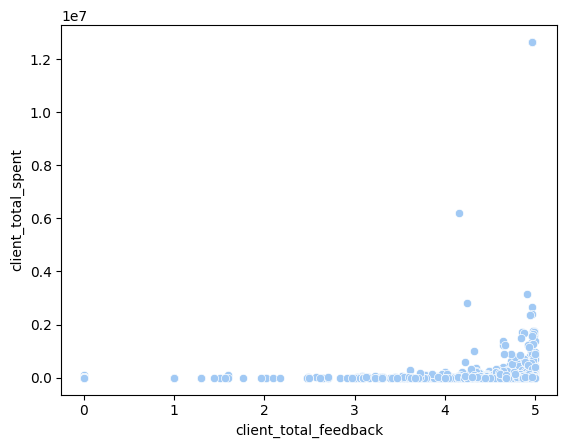

In [ ]:
sns.scatterplot(data = jobs, x = 'client_total_feedback', y = 'client_total_spent')